<a href="https://colab.research.google.com/github/rnrios/IntroDL/blob/master/time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import LSTM

recurrent_model = Sequential()
recurrent_model.add(LSTM(128, input_shape=(10, 1)))
recurrent_model.add(Dense(1))

In [ ]:
recurrent_model.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recurrent_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test_new.shape

(1732,)

In [ ]:
recurrent_model.fit(x_train_new, y_train_new, epochs=50,
                    validation_data=(x_test_new, y_test_new))

Epoch 1/50
490/490 [==============================] - 71s 14ms/step - loss: 0.2512 - val_loss: 0.0885
Epoch 2/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0752 - val_loss: 0.0437
Epoch 3/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0551 - val_loss: 0.0290
Epoch 4/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0466 - val_loss: 0.0355
Epoch 5/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0419 - val_loss: 0.0416
Epoch 6/50
490/490 [==============================] - 7s 14ms/step - loss: 0.0402 - val_loss: 0.0299
Epoch 7/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0377 - val_loss: 0.0411
Epoch 8/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0358 - val_loss: 0.0247
Epoch 9/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0342 - val_loss: 0.0217
Epoch 10/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0334 - val_l

In [ ]:
y_predicted_new = recurrent_model.predict(x_test_new)

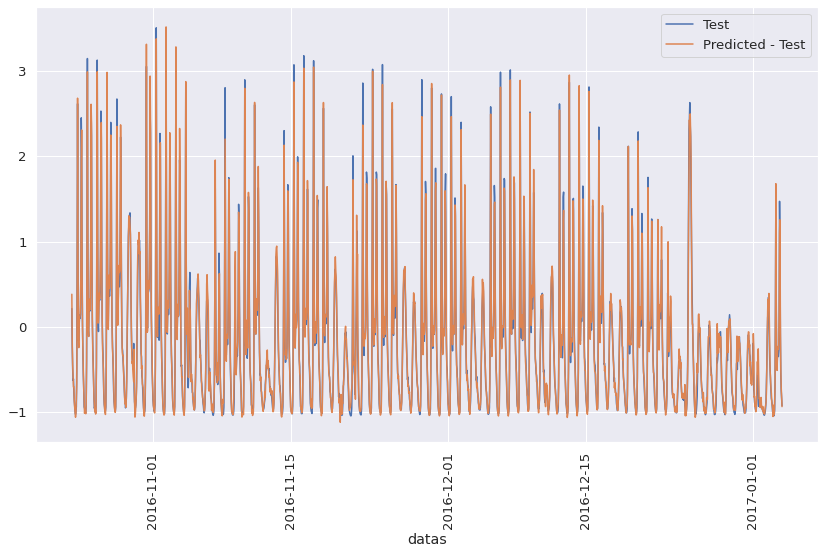

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='datas', y=np.squeeze(y_test_new), data=df[train_len+10:], label='Test')
sns.lineplot(x='datas', y=np.squeeze(y_predicted_new), data=df[train_len+10:], label='Predicted - Test')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv")

#Inspecting dataset

In [ ]:
df.tail()

,tempo,passageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

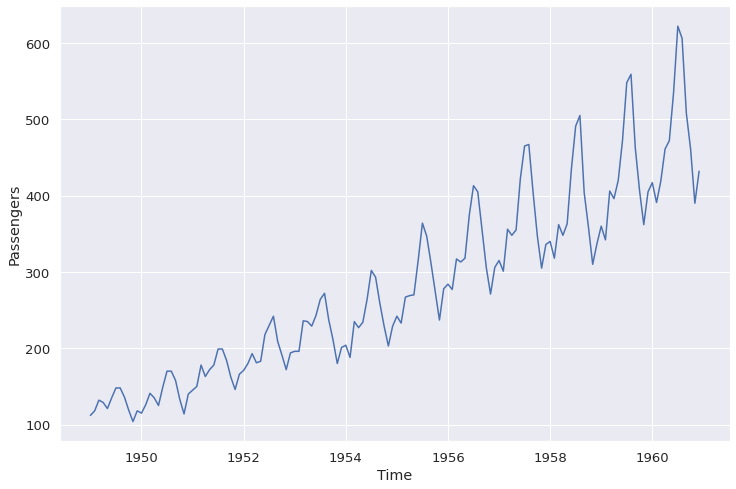

In [ ]:
plt.figure(figsize=(12,8))
fig = sns.lineplot(x='tempo', y='passageiros', data=df)
fig.set_xlabel('Time')
fig.set_ylabel('Passengers')
sns.set(font_scale=1.2)
plt.show()

#Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df)
scaled_array = scaler.transform(df)
scaled_array[-5:]

array([[1.62383679, 2.72441656],
       [1.64789363, 1.9046693 ],
       [1.67195047, 1.5115252 ],
       [1.69600731, 0.91762667],
       [1.72006415, 1.26894693]])

In [ ]:
x = scaled_array[:, 0]
y = scaled_array[:, 1]

train_len = int(.9*len(scaled_array))
x_train = x[:train_len]
x_test = x[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

print('Total samples: {}\tTrain samples: {}\tTest samples: {}'.
      format(len(x), len(x_train), len(x_test)))

Total samples: 144	Train samples: 129	Test samples: 15


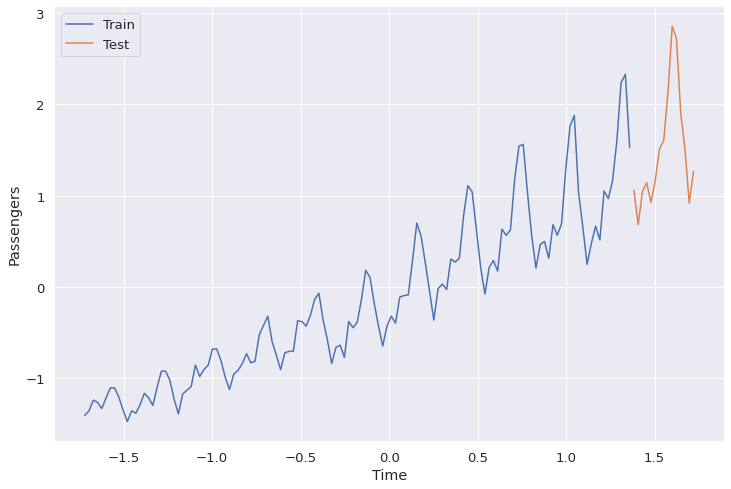

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#Linear regression for predicting #Passengers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='Ones',
                    activation='linear', use_bias=False))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


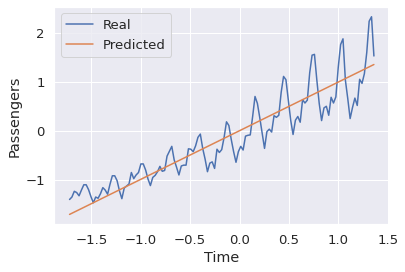

In [ ]:
prediction = model.predict(x_train)

sns.lineplot(x=x_train, y=y_train, label='Real')
sns.lineplot(x=x_train, y=np.squeeze(prediction), label='Predicted')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

In [ ]:
df_prediction_scaled = pd.DataFrame({'time': x_train,
                                      'passengers': np.squeeze(prediction)
                          })
df_prediction_scaled.head()

,time,passengers
0,-1.720064,-1.713097
1,-1.696007,-1.689138
2,-1.671950,-1.665178
3,-1.647894,-1.641219
4,-1.623837,-1.617260


In [ ]:
df_unscaled_train = pd.DataFrame(data = scaler.inverse_transform(df_prediction_scaled),
                            columns = ['time', 'passengers'])
df_unscaled_train.head()

,time,passengers
0,1949.000000,75.499481
1,1949.083333,78.363790
2,1949.166667,81.228127
3,1949.250000,84.092436
4,1949.333333,86.956773


In [ ]:
y_test_predicted = model.predict(x_test)

df_prediction_scaled = pd.DataFrame({'time': x_test,
                                      'passengers': np.squeeze(y_test_predicted)
                          })

df_unscaled_test = pd.DataFrame(data = scaler.inverse_transform(df_prediction_scaled),
                            columns = ['time', 'passengers'])
df_unscaled_test.head()

,time,passengers
0,1959.750000,444.997218
1,1959.833333,447.861541
2,1959.916667,450.725864
3,1960.000000,453.590187
4,1960.083333,456.454510


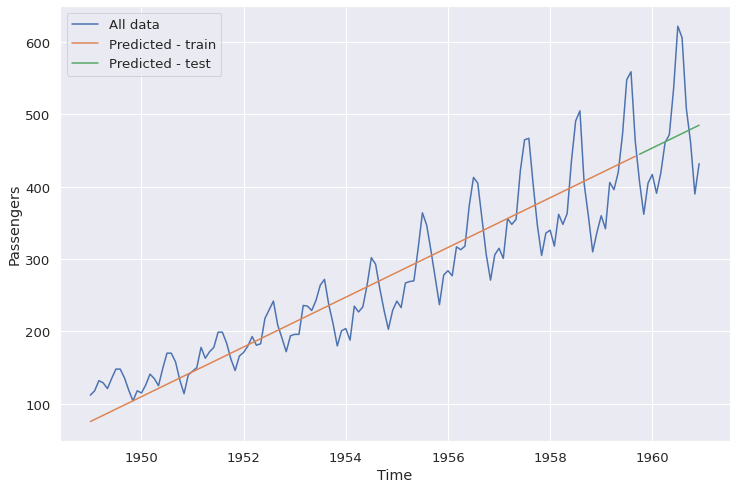

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = df, x='tempo', y='passageiros', label='All data')
sns.lineplot(data = df_unscaled_train, x='time', y='passengers', label='Predicted - train') 
sns.lineplot(data = df_unscaled_test, x='time', y='passengers', label='Predicted - test') 

sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#Increasing number of layers

In [ ]:
model2 = Sequential()
model2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                    activation='linear', use_bias=False))
model2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=False))
model2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 8         
                                                                 
 dense_4 (Dense)             (None, 8)                 64        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(x_train, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 4ms/step - loss: 0.8097
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8092
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8086
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8078
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8065
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8046
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8019
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7982
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7868
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7784
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7677
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
y_train_predicted = model2.predict(x_train)
y_test_predicted = model2.predict(x_test)

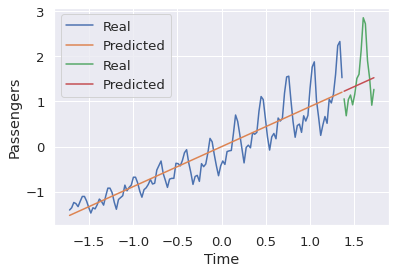

In [ ]:
sns.lineplot(x=x_train, y=y_train, label='Real')
sns.lineplot(x=x_train, y=np.squeeze(y_train_predicted), label='Predicted')
sns.lineplot(x=x_test, y=y_test, label='Real')
sns.lineplot(x=x_test, y=np.squeeze(y_test_predicted), label='Predicted')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#Nonlinear activation

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8127
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8069
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8034
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8005
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7971
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7939
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7903
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7883
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.7860
Epoch 10/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7843
Epoch 11/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7825
Epoch 12/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7822
Epoch 13/1000
5/5 [==============================

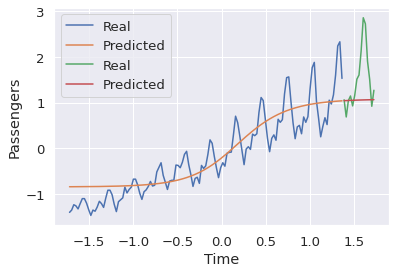

In [ ]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                    activation='sigmoid', use_bias=False))
model3.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
model3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
model3.compile(loss='mean_squared_error', optimizer='adam')

model3.fit(x_train, y_train, epochs=1000)

y_train_predicted = model3.predict(x_train)
y_test_predicted = model3.predict(x_test)

sns.lineplot(x=x_train, y=y_train, label='Real')
sns.lineplot(x=x_train, y=np.squeeze(y_train_predicted), label='Predicted')
sns.lineplot(x=x_test, y=y_test, label='Real')
sns.lineplot(x=x_test, y=np.squeeze(y_test_predicted), label='Predicted')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#Changing data

In [ ]:
def shifted_window(input, n_shift):

  x_new = []
  y_new = []

  for i in range(n_shift, input.shape[0]):
    x_new.append(input[i-n_shift:i])
    y_new.append(input[i])
  x_new, y_new = np.array(x_new), np.array(y_new)

  return x_new, y_new

In [ ]:
x_train_new, y_train_new = shifted_window(y_train, 1)
x_test_new, y_test_new = shifted_window(y_test, 1)

In [ ]:
for i in range(5):
  print('New X train: {}\t New Y train: {}'.format(x_train_new[i], y_train_new[i]))

New X train: [-1.40777884]	 New Y train: -1.3575902326797062
New X train: [-1.35759023]	 New Y train: -1.2404834803335385
New X train: [-1.24048348]	 New Y train: -1.2655777844077172
New X train: [-1.26557778]	 New Y train: -1.3324959286055273
New X train: [-1.33249593]	 New Y train: -1.2153891762593596


In [ ]:
model4 = Sequential()
model4.add(Dense(8, input_dim=1, kernel_initializer='ones',
                    activation='linear', use_bias=False))
model4.add(Dense(64, kernel_initializer='random_uniform', 
                 activation='sigmoid', use_bias=False))
model4.add(Dense(1, kernel_initializer='random_uniform', 
                 activation='linear', use_bias=False))
model4.compile(loss='mean_squared_error', optimizer='adam')

model4.fit(x_train_new, y_train_new, epochs=200)

y_train_predicted_new = model4.predict(x_train_new)
y_test_predicted_new = model4.predict(x_test_new)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8212
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7717
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7378
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7181
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7035
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6852
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6645
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6379
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6154
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5861
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5574
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5247
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

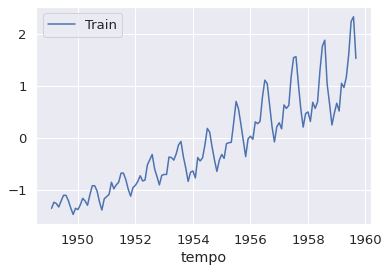

In [ ]:
sns.lineplot(data = df[1:129], x='tempo', y= y_train_new, label='Train')
plt.show()

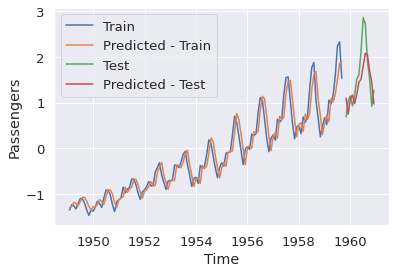

In [ ]:
sns.lineplot(data = df[1:129], x='tempo', y=y_train_new, label='Train')
sns.lineplot(data = df[1:129], x='tempo', y=np.squeeze(y_train_predicted_new), label='Predicted - Train')
sns.lineplot(data = df[130:], x='tempo', y=y_test_new, label='Test')
sns.lineplot(data = df[130:], x='tempo', y=np.squeeze(y_test_predicted_new), label='Predicted - Test')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#Creating shifted window with n>1

In [ ]:
x_train_new, y_train_new = shifted_window(y_train, 4)

In [ ]:
x_train_new[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
y_train_new[:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
x_test_new, y_test_new = shifted_window(y_test, 4)

In [ ]:
#@title Fitting data
model5 = Sequential()
model5.add(Dense(8, input_dim=4, kernel_initializer='ones',
                    activation='linear', use_bias=False))
model5.add(Dense(64, kernel_initializer='random_uniform', 
                 activation='sigmoid', use_bias=False))
model5.add(Dense(1, kernel_initializer='random_uniform', 
                 activation='linear', use_bias=False))
model5.compile(loss='mean_squared_error', optimizer='adam')

model5.fit(x_train_new, y_train_new, epochs=200)

y_train_predicted_new = model5.predict(x_train_new)
y_test_predicted_new = model5.predict(x_test_new)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7781
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6805
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6109
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5378
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4672
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3429
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2889
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2400
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2035
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1570
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

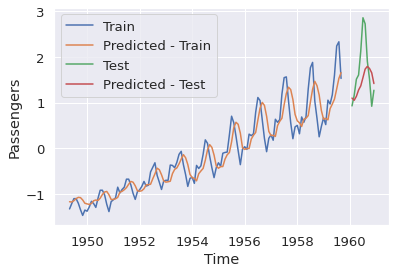

In [ ]:
#@title Plotting results
sns.lineplot(data = df[4:129], x='tempo', y=y_train_new, label='Train')
sns.lineplot(data = df[4:129], x='tempo', y=np.squeeze(y_train_predicted_new), label='Predicted - Train')
sns.lineplot(data = df[133:], x='tempo', y=y_test_new, label='Test')
sns.lineplot(data = df[133:], x='tempo', y=np.squeeze(y_test_predicted_new), label='Predicted - Test')
sns.set(font_scale=1.2)
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()

#New database

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')

df.tail()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [ ]:
df['datas'] = pd.to_datetime(df['datas'])

In [ ]:
scaler_v2 = StandardScaler()
scaler_v2.fit(np.expand_dims(df['contagem'].values, axis=1))
y = scaler_v2.transform(np.expand_dims(df['contagem'].values, axis=1))

In [ ]:
train_len = int(.9*len(y))

y_train = np.squeeze(y)[:train_len]
y_test = np.squeeze(y)[train_len:]

print('Total samples: {}\tTrain samples: {}\tTest samples: {}'.
      format(len(y), len(y_train), len(y_test)))

Total samples: 17414	Train samples: 15672	Test samples: 1742


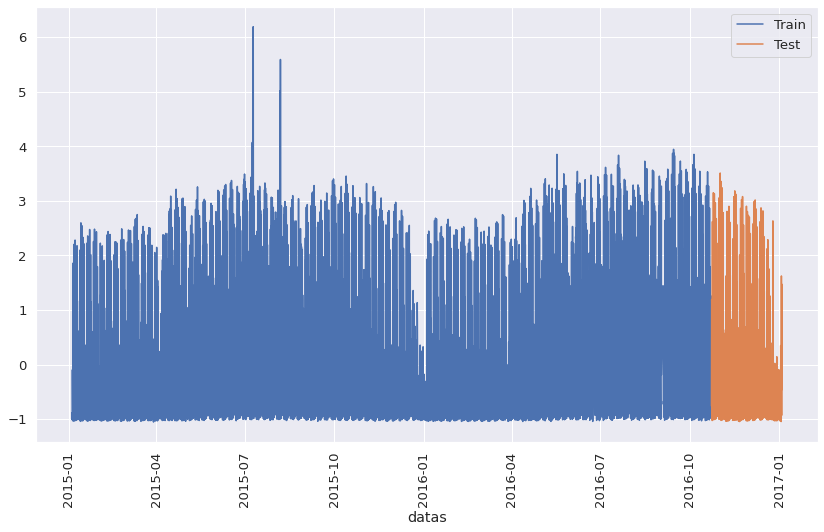

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(x='datas', y=y_train, data=df[:train_len], label='Train')
sns.lineplot(x='datas', y=y_test, data=df[train_len:], label='Test')
plt.xticks(rotation=90)
plt.show()

In [ ]:
x_train_new, y_train_new = shifted_window(y_train, 10)
x_test_new, y_test_new = shifted_window(y_test, 10)

In [ ]:
x_train_new[:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [ ]:
y_train_new[:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [ ]:
x_train_new = np.expand_dims(x_train_new, axis=2)

In [ ]:
x_test_new = np.expand_dims(x_test_new, axis=2)

In [ ]:
from keras.layers import LSTM

recurrent_model = Sequential()
recurrent_model.add(LSTM(128, input_shape=(10, 1)))
recurrent_model.add(Dense(1))

In [ ]:
recurrent_model.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recurrent_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test_new.shape

(1732,)

In [ ]:
recurrent_model.fit(x_train_new, y_train_new, epochs=50,
                    validation_data=(x_test_new, y_test_new))

Epoch 1/50
490/490 [==============================] - 71s 14ms/step - loss: 0.2512 - val_loss: 0.0885
Epoch 2/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0752 - val_loss: 0.0437
Epoch 3/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0551 - val_loss: 0.0290
Epoch 4/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0466 - val_loss: 0.0355
Epoch 5/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0419 - val_loss: 0.0416
Epoch 6/50
490/490 [==============================] - 7s 14ms/step - loss: 0.0402 - val_loss: 0.0299
Epoch 7/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0377 - val_loss: 0.0411
Epoch 8/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0358 - val_loss: 0.0247
Epoch 9/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0342 - val_loss: 0.0217
Epoch 10/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0334 - val_l

In [ ]:
y_predicted_new = recurrent_model.predict(x_test_new)

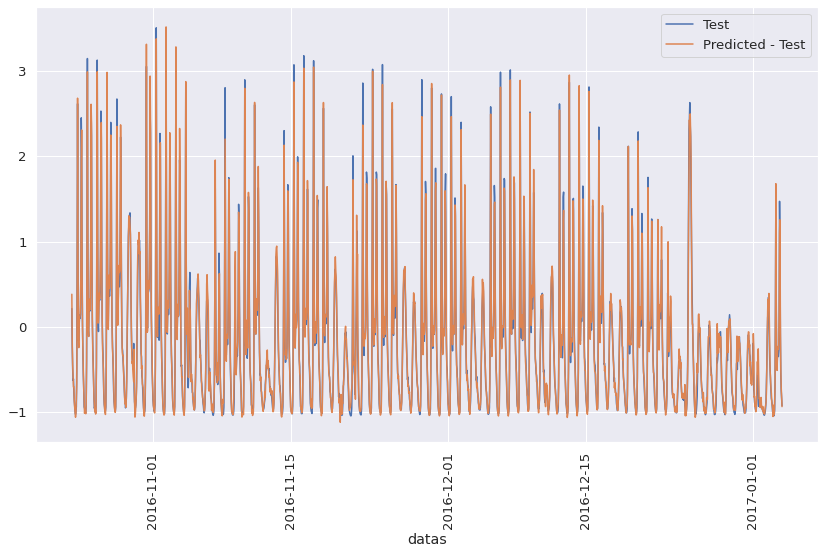

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='datas', y=np.squeeze(y_test_new), data=df[train_len+10:], label='Test')
sns.lineplot(x='datas', y=np.squeeze(y_predicted_new), data=df[train_len+10:], label='Predicted - Test')
plt.xticks(rotation=90)
plt.show()

#GRU

In [ ]:
from tensorflow.keras.layers import GRU


GRU_model = Sequential()
GRU_model.add(GRU(128, input_shape=(10, 1)))
GRU_model.add(Dense(1))


In [ ]:
GRU_model.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
GRU_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
result = GRU_model.fit(x_train_new, y_train_new, epochs=100,
              validation_data=(x_test_new, y_test_new))

Epoch 1/100
490/490 [==============================] - 55s 12ms/step - loss: 0.2157 - val_loss: 0.0776
Epoch 2/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0689 - val_loss: 0.0588
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0505 - val_loss: 0.0256
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0426 - val_loss: 0.0379
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0389 - val_loss: 0.0244
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0361 - val_loss: 0.0229
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0346 - val_loss: 0.0199
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0334 - val_loss: 0.0214
Epoch 9/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0324 - val_loss: 0.0239
Epoch 10/100
490/490 [==============================] - 6s 11ms/step - loss: 0.03

In [ ]:
y_predicted_new_g = recurrent_model.predict(x_test_new)

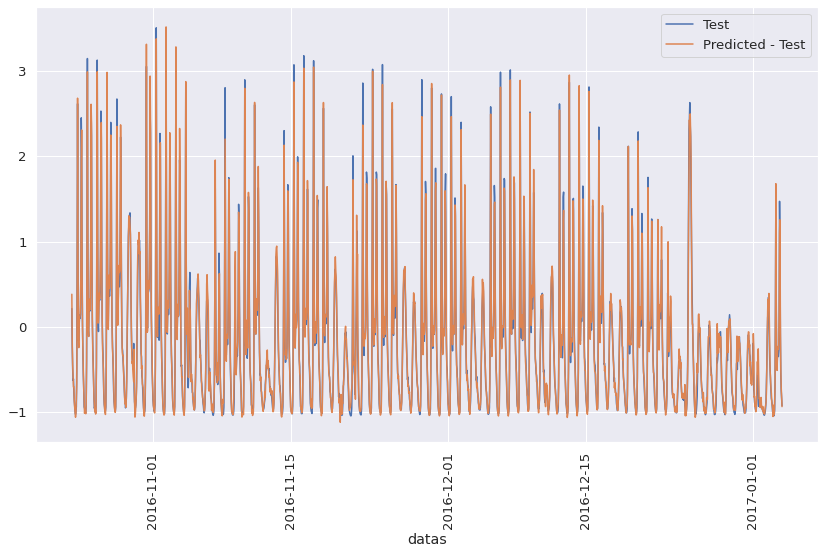

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='datas', y=np.squeeze(y_test_new), data=df[train_len+10:], label='Test')
sns.lineplot(x='datas', y=np.squeeze(y_predicted_new_g), data=df[train_len+10:], label='Predicted - Test')
plt.xticks(rotation=90)
plt.show()

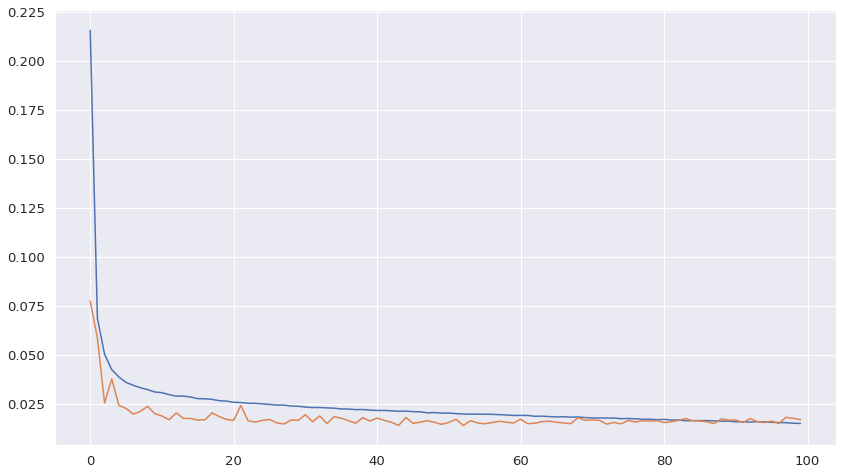

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(result.history['loss'], label='Train')
plt.plot(result.history['val_loss'], label='Val')
plt.show()